## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_single_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_single_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
no_of_mice = complete_single_data["Mouse ID"].unique()
final_mice = len(no_of_mice)
final_mice

#print(f"Number of Mice:{no_of_mice}")

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#duplicate = complete_single_data[complete_single_data.duplicate()]
duplicate = complete_single_data[complete_single_data[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse= complete_single_data.loc[complete_single_data["Mouse ID"]=="g989"]
clean_df=complete_single_data[complete_single_data["Mouse ID"].isin(duplicate_mouse)==False]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_ids = complete_single_data.loc[complete_single_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
#duplicate_mouse_ids
clean_df=complete_single_data[complete_single_data["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

mice_in_cleandf = clean_df["Mouse ID"].unique()
#clean_mouse_df = len(mice_in_cleandf)
len(mice_in_cleandf)




248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_group = complete_single_data.groupby(["Drug Regimen"])
regimen_mean= complete_single_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = complete_single_data. groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_variance = complete_single_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_sd = complete_single_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = complete_single_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
regimen_df = pd.DataFrame({"Mean":(regimen_mean),
                         "Median":(regimen_median),
                         "Variance": (regimen_variance),
                         "Standard Deviation":(regimen_sd),
                         "SEM":(regimen_sem),
                         })
regimen_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = complete_single_data.groupby(["Drug Regimen"])
regimen_mean= complete_single_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = complete_single_data. groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_variance = complete_single_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_sd = complete_single_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = complete_single_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Using the aggregation method, produce the same summary statistics in a single line
regimen_agg_df = regimen_group.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
regimen_agg_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# count for each drug regimen
count= clean_df["Drug Regimen"].value_counts()
count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

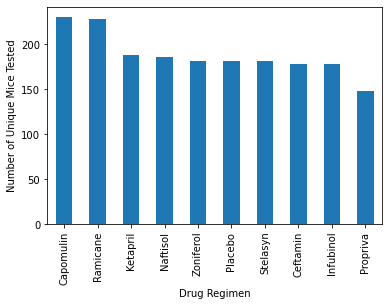

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Unique Mice Tested")
plt.show()




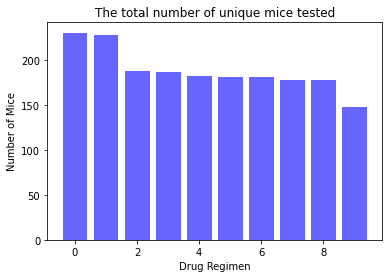

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(count))
#y_axis = clean_df["Drug Regimen"]
plt.bar(x_axis,count, color="blue", alpha=0.6, align="center")
plt.title("The total number of unique mice tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()


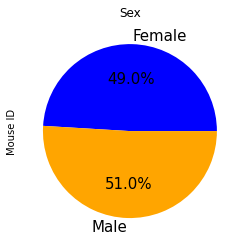

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender =clean_df.groupby("Sex")["Mouse ID"].count()
gender.plot(kind="pie", y="Sex",title="Sex",autopct='%1.1f%%',fontsize=15, colors =["blue","orange"])
plt.show()
#gender

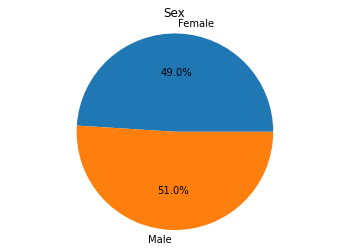

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

my_data = ["49","51"]
my_labels = ["Female", "Male"]
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_volume = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
tum_vol = clean_df.loc[clean_df['Drug Regimen'].isin(tumor_volume)]

# Start by getting the last (greatest) timepoint for each mouse
max_tumor=tum_vol.groupby("Mouse ID").max().reset_index()
max_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_group=max_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')
merge_group



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
drugslist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume =[]
#capomulin=[]
#ramicane=[]
#infubinol=[]
#ceftamin=[]

# Locate the rows which contain mice on each drug and get the tumor volumes
for drugs in drugslist:
    tumor_volume_drug = merge_group["Tumor Volume (mm3)"].loc[merge_group["Drug Regimen"] == drugs]
   
    #add subset 
    tumor_volume.append(tumor_volume_drug)
# Determine outliers using upper and lower bounds
    quartiles = tumor_volume_drug.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"For {drugs}, Interquartile Range (IQR) is {iqr}")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drugs}, values below {lower_bound} could be outliers')
    print(f'For {drugs}, values above {upper_bound} could be outliers') 
    print("---------------------------------------------------------------")


For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers
---------------------------------------------------------------
For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers
---------------------------------------------------------------
For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers
---------------------------------------------------------------
For Ceftamin, Interquartile Range (IQR) is 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers
For Ceftamin, values above 87.66645829999999 could be outliers
--------------------------------------------------------------

<ipython-input-19-3380f05791b3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drugslist)


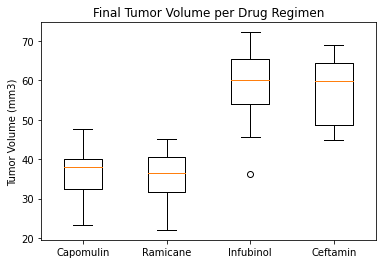

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()
ax.set_title("Final Tumor Volume per Drug Regimen")
ax.set_xticklabels(drugslist)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_volume)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

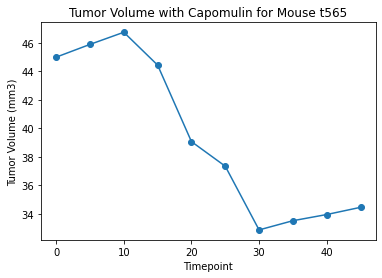

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis =clean_df.loc[clean_df["Mouse ID"]== "t565"]
x_axis = x_axis["Timepoint"]

y_axis =clean_df.loc[clean_df["Mouse ID"]== "t565"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis,marker="o")
plt.title("Tumor Volume with Capomulin for Mouse t565")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

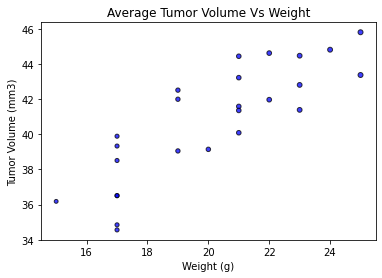

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse = Capomulin_df.groupby("Mouse ID")
mouse_weigh = mouse["Weight (g)"].mean()
mouse_Tvolume = mouse["Tumor Volume (mm3)"].mean()
mouse_dataframe = pd.DataFrame({"Weight (g)": mouse_weigh,
                       "Tumor Volume (mm3)": mouse_Tvolume})
mouse_weight = mouse_dataframe["Weight (g)"]
average_tv = mouse_dataframe["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, average_tv, marker="o", facecolors="blue", edgecolors="black",
            s=mouse_weight, alpha=0.75)
plt.title("Average Tumor Volume Vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


## Correlation and Regression

The correlation coefficient for mouse weight and average tumor is : 0.8419363424694718


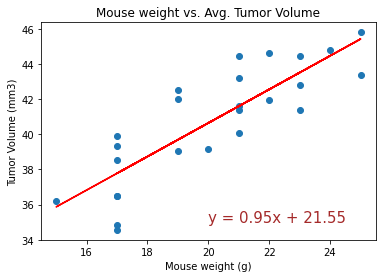

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouse_dataframe["Weight (g)"]
y_values = mouse_dataframe["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="brown")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The correlation coefficient for mouse weight and average tumor is : {rvalue}")

plt.show()
